In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense ,Dropout, LSTM
from tensorflow.keras.models import Sequential
!pip install yfinance
import yfinance as yf


In [2]:
start = dt.datetime(2020,1,1) 
end = dt.datetime.now()
Crypto_currency = "BTC"
Real_currency = "USD"

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
Data = BTC_USD.history(start=start, end=end)
print(Data)

                    Open          High  ...  Dividends  Stock Splits
Date                                    ...                         
2020-01-01   7194.892090   7254.330566  ...          0             0
2020-01-02   7202.551270   7212.155273  ...          0             0
2020-01-03   6984.428711   7413.715332  ...          0             0
2020-01-04   7345.375488   7427.385742  ...          0             0
2020-01-05   7410.451660   7544.497070  ...          0             0
...                  ...           ...  ...        ...           ...
2022-02-15  42586.464844  44667.218750  ...          0             0
2022-02-16  44578.277344  44578.277344  ...          0             0
2022-02-17  43937.070312  44132.972656  ...          0             0
2022-02-18  40552.132812  40929.152344  ...          0             0
2022-02-19  40022.132812  40407.480469  ...          0             0

[781 rows x 7 columns]


In [3]:
Data.value_counts()

Open          High          Low           Close         Volume       Dividends  Stock Splits
5002.578125   5371.348633   4981.909180   5225.629395   38622642935  0          0               1
43854.652344  45293.867188  42807.835938  44118.445312  33079398868  0          0               1
42374.039062  42478.304688  41242.914062  41744.328125  23091543258  0          0               1
42406.781250  44401.863281  41748.156250  43840.285156  28641855926  0          0               1
42412.300781  42992.550781  41852.574219  42244.468750  18152390304  0          0               1
                                                                                               ..
11429.047852  11539.977539  11307.831055  11429.506836  24103426719  0          0               1
11485.608398  11570.786133  11185.941406  11323.397461  23240415076  0          0               1
11495.038086  11799.092773  11408.290039  11742.037109  23860769928  0          0               1
11502.828125  11540.06152

Text(0, 0.5, 'Sales')

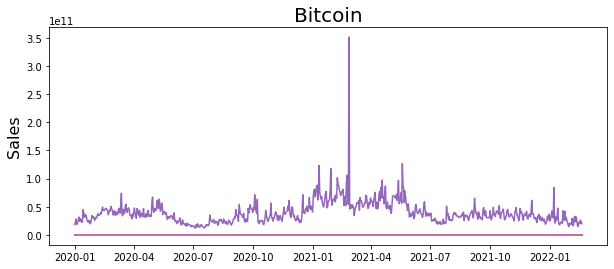

In [11]:

plt.figure(figsize=(10,4))
plt.plot(Data)
plt.title('Bitcoin', fontsize=20)
plt.ylabel('Sales', fontsize=16)
#for day in range(start.day,end.day):
    #plt.axvline(pd.to_datetime(str(day)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Data["Close"].values.reshape(-1,1))

In [6]:
prediction_days = 60
x_train,y_train = [], []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days : x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))


création du modèle


In [7]:
model = Sequential()
model.add(LSTM(units=(50), return_sequences= True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))




In [12]:
model.compile(optimizer="adam",loss="mean_squared_error")
history = model.fit(x_train, y_train , epochs=25 , batch_size=32)


Epoch 1/25
23/23 [==============================] - 10s 43ms/step - loss: 0.0590
Epoch 2/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0094
Epoch 3/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0081
Epoch 4/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0075
Epoch 5/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0065
Epoch 6/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0063
Epoch 7/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0072
Epoch 8/25
23/23 [==============================] - 1s 44ms/step - loss: 0.0066
Epoch 9/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0061
Epoch 10/25
23/23 [==============================] - 1s 44ms/step - loss: 0.0057
Epoch 11/25
23/23 [==============================] - 1s 43ms/step - loss: 0.0072
Epoch 12/25
23/23 [==============================] - 1s 45ms/step - loss: 0.0056
Epoch 13/25
23/23 [=================

on entraine notre modèle


In [8]:
history

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense ,Dropout, LSTM
from tensorflow.keras.models import Sequential
!pip install yfinance
import yfinance as yf
start = dt.datetime(2020,1,1) 
end = dt.datetime.now()
Crypto_currency = "BTC"
Real_currency = "USD"

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
Data = BTC_USD.history(start=start, end=end)
print(Data)
Data.value_counts()

plt.figure(figsize=(10,4))
plt.plot(Data)
plt.title('Bitcoin', fontsize=20)
plt.ylabel('Sales', fontsize=16)
#for day in range(start.day,end.day):
    #plt.axvline(pd.to_datetime(str(day)+'-01-01'), color='k', linestyle='--', alpha=0.2)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Data["Close"].values.reshape(-1,1))
prediction_days = 60
x_train,y_train = [], []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_d

test du modèle

In [13]:
start_mdt = dt.datetime(2020,1,1)
end_mdt = dt.datetime.now()

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
data_mdt = BTC_USD.history(start=start_mdt, end=end_mdt)
actuel_prices= data_mdt["Close"].values

total_dataset= pd.concat((Data["Close"], data_mdt["Close"] ), axis=0)


In [14]:
model_inputs= total_dataset[len(total_dataset)-len(data_mdt)- prediction_days:].values
model_inputs= model_inputs.reshape(-1,1)
model_inputs= scaler.fit_transform(model_inputs)


In [15]:
x_test= []
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days : x, 0])
x_test= np.array(x_test)
x_train= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [16]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

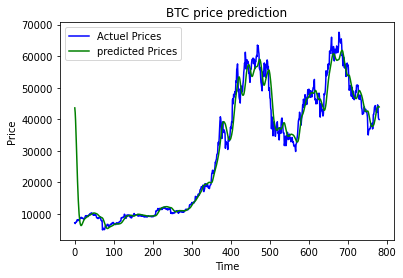

In [17]:
plt.plot(actuel_prices,color="blue", label="Actuel Prices")
plt.plot(prediction_prices,color="green", label="predicted Prices")
plt.title(f"{Crypto_currency} price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

Maintenant, on va prédire le prix du jour suivant.

In [18]:
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data= np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [76]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[43045.855]]


nous avons prédit le prix du jour suivant qui est: 42972.33 USD 




Maintenant nous allons prédire le prix du future

In [77]:
prediction_days = 60
futur_days = 30
x_train,y_train = [], []
for x in range(prediction_days, len(scaled_data)-futur_days):
  x_train.append(scaled_data[x - prediction_days : x,0])
  y_train.append(scaled_data[x+futur_days,0])

x_train,y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], 1))

From here all the steps are the same

In [78]:
model = Sequential()
model.add(LSTM(units=50, return_sequences= True , input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [79]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train, y_train , epochs=25 , batch_size=32)

Epoch 1/25
22/22 [==============================] - 7s 43ms/step - loss: 0.0749
Epoch 2/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0261
Epoch 3/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0211
Epoch 4/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0206
Epoch 5/25
22/22 [==============================] - 1s 45ms/step - loss: 0.0189
Epoch 6/25
22/22 [==============================] - 1s 46ms/step - loss: 0.0193
Epoch 7/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0157
Epoch 8/25
22/22 [==============================] - 1s 42ms/step - loss: 0.0141
Epoch 9/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0137
Epoch 10/25
22/22 [==============================] - 1s 42ms/step - loss: 0.0114
Epoch 11/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0130
Epoch 12/25
22/22 [==============================] - 1s 43ms/step - loss: 0.0108
Epoch 13/25
22/22 [==================

In [80]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
test_data = BTC_USD.history(start=test_start, end=test_end)
actuel_prices= test_data["Close"].values

total_dataset= pd.concat((Data["Close"], test_data["Close"] ), axis=0)

In [81]:
model_inputs= total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs= model_inputs.reshape(-1,1)
model_inputs= scaler.fit_transform(model_inputs)


In [82]:
x_test= []
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days : x, 0])
x_test= np.array(x_test)
x_train= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [83]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

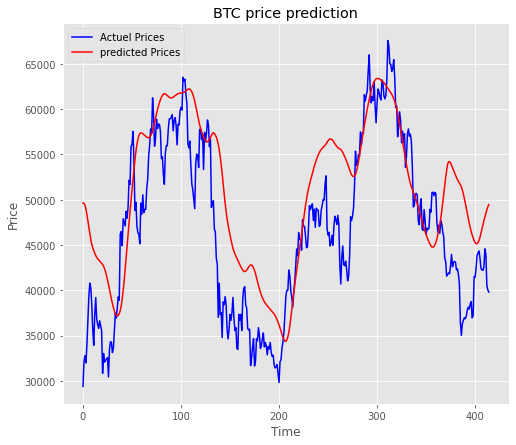

In [85]:
plt.plot(actuel_prices,color="blue", label="Actuel Prices")
plt.plot(prediction_prices,color="red", label="predicted Prices")
plt.title(f"{Crypto_currency} price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

In [25]:
prediction_array=[]
i = 0
 
while i < len(prediction_prices): 
    prediction_array.append(prediction_prices[i][0]) 
    i = i+1

In [26]:
print(prediction_array)

[43610.797, 42178.6, 39605.664, 36177.99, 32251.89, 28153.646, 24150.479, 20437.633, 17132.326, 14290.768, 11936.131, 10054.912, 8616.22, 7572.477, 6883.1494, 6494.6377, 6346.706, 6385.568, 6559.993, 6818.469, 7118.746, 7431.21, 7732.7583, 8001.977, 8228.884, 8408.664, 8547.488, 8658.674, 8760.666, 8860.648, 8964.59, 9068.897, 9170.388, 9264.559, 9347.03, 9412.938, 9470.824, 9527.38, 9586.282, 9649.243, 9720.942, 9794.769, 9873.791, 9959.801, 10048.213, 10136.863, 10212.959, 10271.613, 10306.082, 10326.462, 10327.345, 10308.366, 10274.424, 10230.162, 10186.266, 10142.303, 10091.782, 10021.507, 9928.637, 9814.383, 9683.104, 9541.46, 9403.675, 9277.105, 9165.482, 9078.099, 9018.74, 8981.53, 8942.816, 8887.924, 8812.944, 8720.5205, 8549.697, 8299.173, 7976.959, 7607.95, 7209.8193, 6807.58, 6422.016, 6089.0894, 5825.6978, 5634.957, 5503.9814, 5433.2656, 5423.252, 5464.814, 5546.2, 5649.076, 5754.3477, 5843.202, 5918.2666, 5981.829, 6039.1665, 6096.8467, 6155.62, 6217.4746, 6280.043, 6351.5

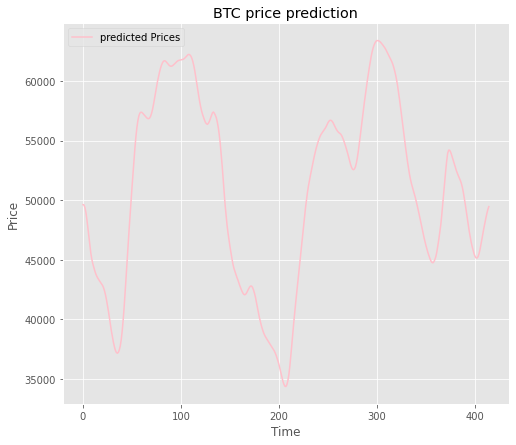

In [100]:
plt.plot(prediction_prices,color="pink", label="predicted Prices")
plt.title(f"{Crypto_currency} price prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()